# Proyek Analisis Data: E-Commerce Public Dataset
- **Nama:** Mukhlis Maulana Al-Fakih
- **Email:** mukhlis.maulanaalf@gmail.com
- **ID Dicoding:** alfakih

## Menentukan Pertanyaan Bisnis

- Produk atau kategori produk mana yang paling banyak terjual dan memiliki potensi peningkatan penjualan?
- Daerah mana pelanggan berasal dan daerah mana yang mendominasi penjualan?

## Import Semua Packages/Library yang Digunakan

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import geopandas as gpd
import geoplot as gplt
import geoplot.crs as gcrs
import matplotlib.pyplot as plt
import geodatasets
import folium
from folium.plugins import HeatMap
from folium.plugins import MarkerCluster
from folium import Choropleth, Map, LinearColormap
from branca.colormap import linear

## Data Wrangling

### Gathering Data

In [2]:
customer_data = pd.read_csv('data/olist_customers_dataset.csv')
geo_data = pd.read_csv('data/olist_geolocation_dataset.csv')
order_items_data = pd.read_csv('data/olist_order_items_dataset.csv')
order_payments_data = pd.read_csv('data/olist_order_payments_dataset.csv')
order_reviews_data = pd.read_csv('data/olist_order_reviews_dataset.csv')
orders_data = pd.read_csv('data/olist_orders_dataset.csv')
products_data = pd.read_csv('data/olist_products_dataset.csv')
sellers_data = pd.read_csv('data/olist_sellers_dataset.csv')
product_category_data = pd.read_csv('data/product_category_name_translation.csv')


**Insight:**

<ul>
    <li><strong>Customer-Centric Analysis:</strong> Dataset ini menyediakan informasi yang cukup untuk melakukan
      analisis berbasis pelanggan, baik untuk melihat distribusi geografis pelanggan, frekuensi pembelian, hingga ulasan
      produk.</li>
    <li><strong>Product-Centric Analysis:</strong> Data produk dan pesanan dapat memberikan insight mengenai produk
      terlaris, kategori yang paling laris, dan produk dengan potensi untuk lebih dipromosikan.</li>
    <li><strong>Operational Analysis:</strong> Melalui data pengiriman, kita bisa menganalisis efektivitas logistik dan
      pengaruhnya terhadap kepuasan pelanggan.</li>
    <li><strong>Segmentasi Pelanggan:</strong> Dataset memungkinkan untuk melakukan segmentasi pelanggan berdasarkan
      perilaku pembelian (RFM) serta mengidentifikasi pelanggan bernilai tinggi untuk strategi pemasaran yang tepat.
    </li>
  </ul>


### Assessing Data

**Membuat fungsi untuk mempermudah proses assessing data**

In [3]:
def assess_data(path, date_columns=None):
    # 1. Memuat dataset dari path yang diberikan
    try:
        dataset = pd.read_csv(path)
        print(f"Dataset loaded successfully from {path}")
    except Exception as e:
        print(f"Error loading dataset: {e}")
        return
    
    # 2. Menampilkan beberapa baris pertama
    print("\n--- First 5 Rows of Data ---")
    print(dataset.head())
    
    # 3. Menampilkan informasi struktur dataset
    print("\n--- Dataset Information ---")
    print(dataset.info())
    
    # 4. Memeriksa missing values
    print("\n--- Missing Values ---")
    missing_values = dataset.isnull().sum()
    print(missing_values[missing_values > 0])
    
    # 5. Memeriksa duplikasi
    duplicates = dataset.duplicated().sum()
    print(f"\n--- Number of Duplicate Rows: {duplicates}")
    
    # 6. Mengonversi kolom tanggal (jika ada)
    if date_columns:
        for col in date_columns:
            if col in dataset.columns:
                dataset[col] = pd.to_datetime(dataset[col], errors='coerce')
                print(f"Converted {col} to datetime format.")
    
    # 7. Menampilkan deskripsi statistik untuk data numerik
    print("\n--- Statistical Summary ---")
    print(dataset.describe())
    
    # 8. Menampilkan distribusi data untuk kolom kategorikal
    print("\n--- Value Counts for Categorical Columns ---")
    for col in dataset.select_dtypes(include='object').columns:
        print(f"\n{col} value counts:")
        print(dataset[col].value_counts().head(10))  # Menampilkan 10 nilai terbanyak
    
    return dataset

In [4]:
# Dataset order_items_data
order_items_data = assess_data('data/olist_order_items_dataset.csv', date_columns=['shipping_limit_date'])

Dataset loaded successfully from data/olist_order_items_dataset.csv

--- First 5 Rows of Data ---
                           order_id  order_item_id  \
0  00010242fe8c5a6d1ba2dd792cb16214              1   
1  00018f77f2f0320c557190d7a144bdd3              1   
2  000229ec398224ef6ca0657da4fc703e              1   
3  00024acbcdf0a6daa1e931b038114c75              1   
4  00042b26cf59d7ce69dfabb4e55b4fd9              1   

                         product_id                         seller_id  \
0  4244733e06e7ecb4970a6e2683c13e61  48436dade18ac8b2bce089ec2a041202   
1  e5f2d52b802189ee658865ca93d83a8f  dd7ddc04e1b6c2c614352b383efe2d36   
2  c777355d18b72b67abbeef9df44fd0fd  5b51032eddd242adc84c38acab88f23d   
3  7634da152a4610f1595efa32f14722fc  9d7a1d34a5052409006425275ba1c2b4   
4  ac6c3623068f30de03045865e4e10089  df560393f3a51e74553ab94004ba5c87   

   shipping_limit_date   price  freight_value  
0  2017-09-19 09:45:35   58.90          13.29  
1  2017-05-03 11:05:13  239.90          19

In [5]:
# Dataset product_data
products_data = assess_data('data/olist_products_dataset.csv')

Dataset loaded successfully from data/olist_products_dataset.csv

--- First 5 Rows of Data ---
                         product_id  product_category_name  \
0  1e9e8ef04dbcff4541ed26657ea517e5             perfumaria   
1  3aa071139cb16b67ca9e5dea641aaa2f                  artes   
2  96bd76ec8810374ed1b65e291975717f          esporte_lazer   
3  cef67bcfe19066a932b7673e239eb23d                  bebes   
4  9dc1a7de274444849c219cff195d0b71  utilidades_domesticas   

   product_name_lenght  product_description_lenght  product_photos_qty  \
0                 40.0                       287.0                 1.0   
1                 44.0                       276.0                 1.0   
2                 46.0                       250.0                 1.0   
3                 27.0                       261.0                 1.0   
4                 37.0                       402.0                 4.0   

   product_weight_g  product_length_cm  product_height_cm  product_width_cm  
0        

In [6]:
# Dataset customer_data
customer_data = assess_data('data/olist_customers_dataset.csv')

Dataset loaded successfully from data/olist_customers_dataset.csv

--- First 5 Rows of Data ---
                        customer_id                customer_unique_id  \
0  06b8999e2fba1a1fbc88172c00ba8bc7  861eff4711a542e4b93843c6dd7febb0   
1  18955e83d337fd6b2def6b18a428ac77  290c77bc529b7ac935b93aa66c333dc3   
2  4e7b3e00288586ebd08712fdd0374a03  060e732b5b29e8181a18229c7b0b2b5e   
3  b2b6027bc5c5109e529d4dc6358b12c3  259dac757896d24d7702b9acbbff3f3c   
4  4f2d8ab171c80ec8364f7c12e35b23ad  345ecd01c38d18a9036ed96c73b8d066   

   customer_zip_code_prefix          customer_city customer_state  
0                     14409                 franca             SP  
1                      9790  sao bernardo do campo             SP  
2                      1151              sao paulo             SP  
3                      8775        mogi das cruzes             SP  
4                     13056               campinas             SP  

--- Dataset Information ---
<class 'pandas.core.frame.Da

In [7]:
# Dataset orders_data
orders_data = assess_data('data/olist_orders_dataset.csv', date_columns=['order_purchase_timestamp'])

Dataset loaded successfully from data/olist_orders_dataset.csv

--- First 5 Rows of Data ---
                           order_id                       customer_id  \
0  e481f51cbdc54678b7cc49136f2d6af7  9ef432eb6251297304e76186b10a928d   
1  53cdb2fc8bc7dce0b6741e2150273451  b0830fb4747a6c6d20dea0b8c802d7ef   
2  47770eb9100c2d0c44946d9cf07ec65d  41ce2a54c0b03bf3443c3d931a367089   
3  949d5b44dbf5de918fe9c16f97b45f8a  f88197465ea7920adcdbec7375364d82   
4  ad21c59c0840e6cb83a9ceb5573f8159  8ab97904e6daea8866dbdbc4fb7aad2c   

  order_status order_purchase_timestamp    order_approved_at  \
0    delivered      2017-10-02 10:56:33  2017-10-02 11:07:15   
1    delivered      2018-07-24 20:41:37  2018-07-26 03:24:27   
2    delivered      2018-08-08 08:38:49  2018-08-08 08:55:23   
3    delivered      2017-11-18 19:28:06  2017-11-18 19:45:59   
4    delivered      2018-02-13 21:18:39  2018-02-13 22:20:29   

  order_delivered_carrier_date order_delivered_customer_date  \
0          2017-10-

In [8]:
# Dataset product_category_data
product_category_data = assess_data('data/product_category_name_translation.csv')

Dataset loaded successfully from data/product_category_name_translation.csv

--- First 5 Rows of Data ---
    product_category_name product_category_name_english
0            beleza_saude                 health_beauty
1  informatica_acessorios         computers_accessories
2              automotivo                          auto
3         cama_mesa_banho                bed_bath_table
4        moveis_decoracao               furniture_decor

--- Dataset Information ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71 entries, 0 to 70
Data columns (total 2 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   product_category_name          71 non-null     object
 1   product_category_name_english  71 non-null     object
dtypes: object(2)
memory usage: 1.2+ KB
None

--- Missing Values ---
Series([], dtype: int64)

--- Number of Duplicate Rows: 0

--- Statistical Summary ---
       product_category_name produc

In [10]:
# Dataset geo_data
geo_data = assess_data('data/olist_geolocation_dataset.csv')

Dataset loaded successfully from data/olist_geolocation_dataset.csv

--- First 5 Rows of Data ---
   geolocation_zip_code_prefix  geolocation_lat  geolocation_lng  \
0                         1037       -23.545621       -46.639292   
1                         1046       -23.546081       -46.644820   
2                         1046       -23.546129       -46.642951   
3                         1041       -23.544392       -46.639499   
4                         1035       -23.541578       -46.641607   

  geolocation_city geolocation_state  
0        sao paulo                SP  
1        sao paulo                SP  
2        sao paulo                SP  
3        sao paulo                SP  
4        sao paulo                SP  

--- Dataset Information ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000163 entries, 0 to 1000162
Data columns (total 5 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    ----- 

**Insight:**
    <p><strong><code>order_items_data</code></strong>:</p>
    <ul>
      <li>Missing values: <strong>0</strong> (Tidak ada nilai yang hilang).</li>
      <li>Duplicate data: <strong>0</strong> (Tidak ada data yang terduplikasi).</li>
    </ul>
    <p><strong><code>products_data</code></strong>:</p>
    <ul>
      <li>Missing values:<ul>
          <li><code>product_category_name</code>: <strong>610</strong> missing values.</li>
          <li><code>product_name_lenght</code>: <strong>610</strong> missing values.</li>
          <li><code>product_description_lenght</code>: <strong>610</strong> missing values.</li>
          <li><code>product_photos_qty</code>: <strong>610</strong> missing values.</li>
          <li><code>product_weight_g</code>: <strong>2</strong> missing values.</li>
          <li><code>product_length_cm</code>: <strong>2</strong> missing values.</li>
          <li><code>product_height_cm</code>: <strong>2</strong> missing values.</li>
          <li><code>product_width_cm</code>: <strong>2</strong> missing values.</li>
        </ul>
      </li>
      <li>Duplicate data: <strong>0</strong> (Tidak ada data yang terduplikasi).</li>
    </ul>
    <p><strong><code>customer_data</code></strong>:</p>
    <ul>
      <li>Missing values: <strong>0</strong> (Tidak ada nilai yang hilang).</li>
      <li>Duplicate data: <strong>0</strong> (Tidak ada data yang terduplikasi).</li>
    </ul>
    <p><strong><code>orders_data</code></strong>:</p>
    <ul>
      <li>Missing values:<ul>
          <li><code>order_approved_at</code>: <strong>160</strong> missing values.</li>
          <li><code>order_delivered_carrier_date</code>: <strong>1783</strong> missing values.</li>
          <li><code>order_delivered_customer_date</code>: <strong>2965</strong> missing values.</li>
        </ul>
      </li>
      <li>Duplicate data: <strong>0</strong> (Tidak ada data yang terduplikasi).</li>
    </ul>
    <p><strong><code>product_category_data</code></strong>:</p>
    <ul>
      <li>Missing values: <strong>0</strong> (Tidak ada nilai yang hilang).</li>
      <li>Duplicate data: <strong>0</strong> (Tidak ada data yang terduplikasi).</li>
    </ul>
    <p><strong><code>geo_data</code></strong>:</p>
    <ul>
      <li>Missing values: <strong>0</strong> (Tidak ada nilai yang hilang).</li>
      <li>Duplicate data: <strong>261831</strong></li>
    </ul>
    <h3><strong>Kesimpulan</strong></h3>
    <p>
    Melihat jumlah missing values yang relatif kecil dibandingkan dengan ukuran dataset secara keseluruhan, sehingga tidak akan terlalu berdampak signifikan pada analisis. Maka proses cleaning data nanti akan dilakukan dengan cara menghapus data yang memiliki missing value tanpa mengganti nilainya.
    </p>

### Cleaning Data

In [12]:
# Dataset products_data
products_data_cleaned = products_data.dropna()

# Dataset orders_data
orders_data_cleaned = orders_data.dropna()

**Insight:**
- <code>Cleanup Products Data</code>
- <code>Cleanup Orders Data</code>

## Exploratory Data Analysis (EDA)

### Explore Tren Product

In [13]:
# Menghitung total penjualan per produk
product_sales = order_items_data.groupby('product_id')['price'].sum().reset_index()
product_sales = product_sales.sort_values(by='price', ascending=False)
product_sales

product_id     price
24086  bb50f2e236e5eea0100680137654686c  63885.00
14068  6cdd53843498f92890544667809f1595  54730.20
27613  d6160fb7873f184099d9bc95e30376af  48899.34
27039  d1c427060a0f73f6b889a5c7c61f2ac4  47214.51
19742  99a4788cb24856965c36a24e339b6058  43025.56
...                                 ...       ...
6086   2e8316b31db34314f393806fd7b6e185      2.99
13461  680cc8535be7cc69544238c1d6a83fe8      2.90
17767  8a3254bee785a526d548a81a9bc3c9be      2.55
6388   310dc32058903b6416c71faff132df9e      2.29
9238   46fce52cef5caa7cc225a5531c946c8b      2.20

[32951 rows x 2 columns]

In [14]:
# Menggabungkan dengan data kategori produk bahasa Inggris
product_sales = product_sales.merge(products_data[['product_id', 'product_category_name']], on='product_id', how='left')
product_sales = product_sales.merge(product_category_data, on='product_category_name', how='left')
product_sales


product_id     price  \
0      bb50f2e236e5eea0100680137654686c  63885.00   
1      6cdd53843498f92890544667809f1595  54730.20   
2      d6160fb7873f184099d9bc95e30376af  48899.34   
3      d1c427060a0f73f6b889a5c7c61f2ac4  47214.51   
4      99a4788cb24856965c36a24e339b6058  43025.56   
...                                 ...       ...   
32946  2e8316b31db34314f393806fd7b6e185      2.99   
32947  680cc8535be7cc69544238c1d6a83fe8      2.90   
32948  8a3254bee785a526d548a81a9bc3c9be      2.55   
32949  310dc32058903b6416c71faff132df9e      2.29   
32950  46fce52cef5caa7cc225a5531c946c8b      2.20   

                   product_category_name    product_category_name_english  
0                           beleza_saude                    health_beauty  
1                           beleza_saude                    health_beauty  
2                                    pcs                        computers  
3                 informatica_acessorios            computers_accessories  
4                        cama_mesa_banho                   bed_bath_table  
...                                  ...                              ...  
32946                          papelaria                       stationery  
32947                           pet_shop                         pet_shop  
32948  construcao_ferramentas_construcao  construction_tools_construction  
32949                          papelaria                       stationery  
32950                       beleza_saude                    health_beauty  

[32951 rows x 4 columns]

In [15]:
# Menggabungkan orders_data dengan order_item_data untuk mendapatkan kolom waktu
order_item_with_time = order_items_data.merge(orders_data_cleaned[['order_id', 'order_purchase_timestamp']], on='order_id', how='left')

# Konversi kolom 'order_purchase_timestamp' ke format datetime dan periksa nilai yang tidak dapat dikonversi
order_item_with_time['order_purchase_timestamp'] = pd.to_datetime(order_item_with_time['order_purchase_timestamp'], errors='coerce', format='%Y')

# Cek apakah ada nilai yang tidak bisa dikonversi menjadi datetime
invalid_dates = order_item_with_time['order_purchase_timestamp'].isnull().sum()

print(f"Jumlah nilai waktu yang tidak valid: {invalid_dates}")
order_item_with_time = order_item_with_time.dropna(subset=['order_purchase_timestamp'], how='all')
now_invalid_dates = order_item_with_time['order_purchase_timestamp'].isnull().sum()
print(f"Sekarang Jumlah nilai waktu yang tidak valid: {now_invalid_dates}")
order_item_with_time.isnull().sum()



Jumlah nilai waktu yang tidak valid: 2470
Sekarang Jumlah nilai waktu yang tidak valid: 0


order_id                    0
order_item_id               0
product_id                  0
seller_id                   0
shipping_limit_date         0
price                       0
freight_value               0
order_purchase_timestamp    0
dtype: int64

In [16]:
# Menghitung total penjualan per kategori produk
category_sales = product_sales.groupby('product_category_name_english')['price'].sum().reset_index()
category_sales = category_sales.sort_values(by='price', ascending=False)
category_sales


product_category_name_english       price
43                 health_beauty  1258681.34
70                 watches_gifts  1205005.68
7                 bed_bath_table  1036988.68
65                sports_leisure   988048.97
15         computers_accessories   911954.32
..                           ...         ...
35                       flowers     1110.04
46                home_comfort_2      760.27
11             cds_dvds_musicals      730.00
29     fashion_childrens_clothes      569.85
61         security_and_services      283.29

[71 rows x 2 columns]

### Geosplatial Anaylsis

In [17]:
# Cek jumlah unik kode pos
unique_zip_codes = geo_data['geolocation_zip_code_prefix'].nunique()
print(f"Jumlah unik kode pos di geo_data: {unique_zip_codes}")

# Cek jumlah unik lat/lng
unique_geolocations = geo_data[['geolocation_lat', 'geolocation_lng']].drop_duplicates().shape[0]
print(f"Jumlah unik lokasi geografis (lat/lng): {unique_geolocations}")


Jumlah unik kode pos di geo_data: 19015
Jumlah unik lokasi geografis (lat/lng): 718463


In [18]:
# Mengambil satu lokasi (lat/lng) per kode pos untuk menghindari duplikasi
geo_data_unique = geo_data.drop_duplicates(subset=['geolocation_zip_code_prefix'])

# Lalu merge data pelanggan dengan data geografis yang sudah didedup
customer_geo_unique = customer_data.merge(geo_data_unique[['geolocation_zip_code_prefix', 'geolocation_lat', 'geolocation_lng']],
                                          left_on='customer_zip_code_prefix', right_on='geolocation_zip_code_prefix', how='left')

# Cek hasil merge
print(customer_geo_unique.shape)

(99441, 8)


In [19]:
# cek missing values setelah dimerge
print("Sebelum: ",customer_geo_unique.isnull().sum())
customer_geo_unique_cleaned = customer_geo_unique.dropna()
print("Sesudah", customer_geo_unique_cleaned.isnull().sum())

Sebelum:  customer_id                      0
customer_unique_id               0
customer_zip_code_prefix         0
customer_city                    0
customer_state                   0
geolocation_zip_code_prefix    278
geolocation_lat                278
geolocation_lng                278
dtype: int64
Sesudah customer_id                    0
customer_unique_id             0
customer_zip_code_prefix       0
customer_city                  0
customer_state                 0
geolocation_zip_code_prefix    0
geolocation_lat                0
geolocation_lng                0
dtype: int64


In [110]:
# Menggabungkan data order_item_data dengan sellers_data untuk mendapatkan informasi lokasi penjual
sales_per_seller_state = order_items_data.merge(sellers_data[['seller_id', 'seller_city', 'seller_state']], on='seller_id', how='left')

# Menghitung total penjualan per negara bagian penjual
sales_per_state = sales_per_seller_state.groupby('seller_state')['price'].sum().reset_index()

# Sortir berdasarkan penjualan tertinggi
sales_per_state = sales_per_state.sort_values(by='price', ascending=False)
sales_per_state

seller_state       price
22           SP  8753396.21
15           PR  1261887.21
8            MG  1011564.74
16           RJ   843984.22
20           SC   632426.07
19           RS   378559.54
2            BA   285561.56
4            DF    97749.48
13           PE    91493.85
6            GO    66399.21
5            ES    47689.61
7            MA    36408.95
3            CE    20240.64
12           PB    17095.00
10           MT    17070.72
17           RN     9992.60
9            MS     8551.69
18           RO     4762.20
14           PI     2522.00
21           SE     1606.20
11           PA     1238.00
1            AM     1177.00
0            AC      267.00

In [21]:
import requests

geo_json_data = requests.get(
    "https://raw.githubusercontent.com/giuliano-macedo/geodata-br-states/refs/heads/main/geojson/br_states.json"
).json()

In [23]:
import json

with open("br_states.json") as f:
  geojson_data = json.load(f)

# Cek fitur di GeoJSON
print(geojson_data['features'][0])  

{'id': 'AC', 'geometry': {'type': 'MultiPolygon', 'coordinates': [[[[-66.80619273559516, -9.814462991904888], [-66.64484784925106, -9.88338609230922], [-66.61981896813647, -9.894077096213199], [-66.62664963527251, -9.899697534251452], [-66.62445891852116, -9.907380371353499], [-66.63571308805447, -9.913351976934425], [-66.6263740066112, -9.921544380320737], [-66.6326834782703, -9.922560092996138], [-66.6357664944535, -9.926601171054191], [-66.62706891127188, -9.932005899650195], [-66.6274580337192, -9.935784807992885], [-66.6333475672657, -9.937325599276205], [-66.63584862147779, -9.941760930612888], [-66.63807074736349, -9.95217981647926], [-66.65046033473645, -9.945553655031505], [-66.65190288104053, -9.936721511226034], [-66.65587533771645, -9.942115675434595], [-66.65753930319877, -9.936358753567879], [-66.66373598827454, -9.939844852184404], [-66.66698585944823, -9.946377880276454], [-66.6641862464543, -9.949017593734231], [-66.67006851651513, -9.960276958996543], [-66.67659912031

In [107]:
# Membuat dictionary yang memetakan seller_state ke total penjualan (price)
sales_dict = sales_per_state.set_index('seller_state')['price'].to_dict()

# Cek dictionary yang dihasilkan
sales_dict

{'SP': 8753396.21,
 'PR': 1261887.21,
 'MG': 1011564.74,
 'RJ': 843984.22,
 'SC': 632426.07,
 'RS': 378559.54,
 'BA': 285561.56,
 'DF': 97749.48,
 'PE': 91493.85,
 'GO': 66399.21,
 'ES': 47689.61,
 'MA': 36408.95,
 'CE': 20240.64,
 'PB': 17095.0,
 'MT': 17070.72,
 'RN': 9992.6,
 'MS': 8551.69,
 'RO': 4762.2,
 'PI': 2522.0,
 'SE': 1606.2,
 'PA': 1238.0,
 'AM': 1177.0,
 'AC': 267.0}

**Insight:**
<ul>
  <code>Tren Product by Category</code>
  <li><strong>Produk paling laris berdasarkan kategori</strong> adalah beleza_saude/ atau dalam bahasa inggris adalah health_beauty</li>  
</ul>
<ul>
  <code>Geosplatial Analysis</code>
  <li></li>
  <li></li>
</ul>

## Visualization & Explanatory Analysis

### Pertanyaan 1: Produk atau kategori produk mana yang paling banyak terjual dan memiliki potensi peningkatan penjualan?

C:\Users\mukhl\AppData\Local\Temp\ipykernel_22552\196244250.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='price', y='product_id', data=top_products, palette='Blues_r')


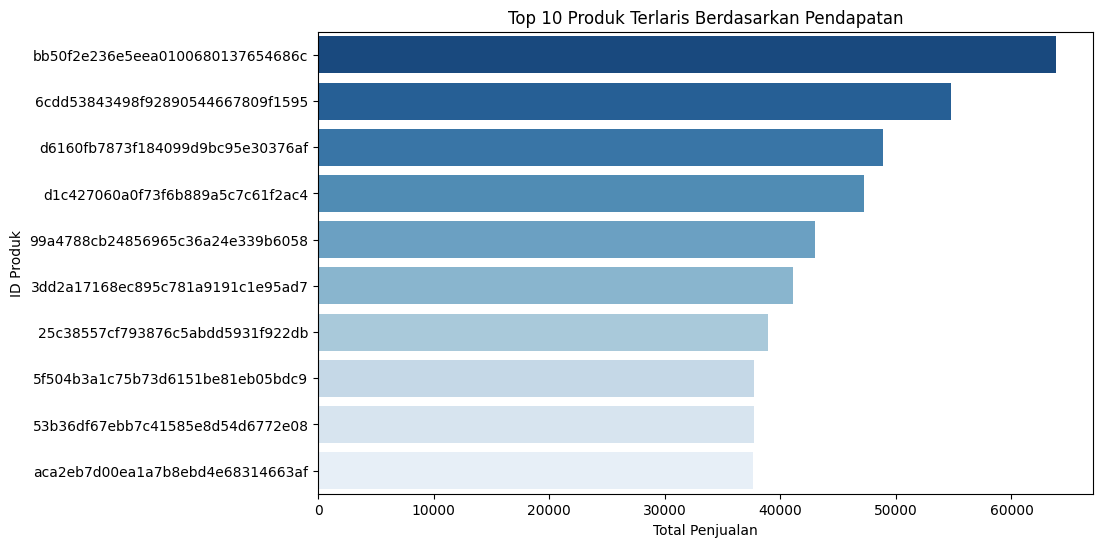

In [31]:
# Visualisasi produk terlaris berdasarkan total pendapatan
plt.figure(figsize=(10, 6))
top_products = product_sales.head(10)  # Ambil 10 produk terlaris
sns.barplot(x='price', y='product_id', data=top_products, palette='Blues_r')
plt.title('Top 10 Produk Terlaris Berdasarkan Pendapatan')
plt.xlabel('Total Penjualan')
plt.ylabel('ID Produk')
plt.show()

C:\Users\mukhl\AppData\Local\Temp\ipykernel_22552\821275670.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='price', y='product_category_name_english', data=top_categories, palette='Blues_r')


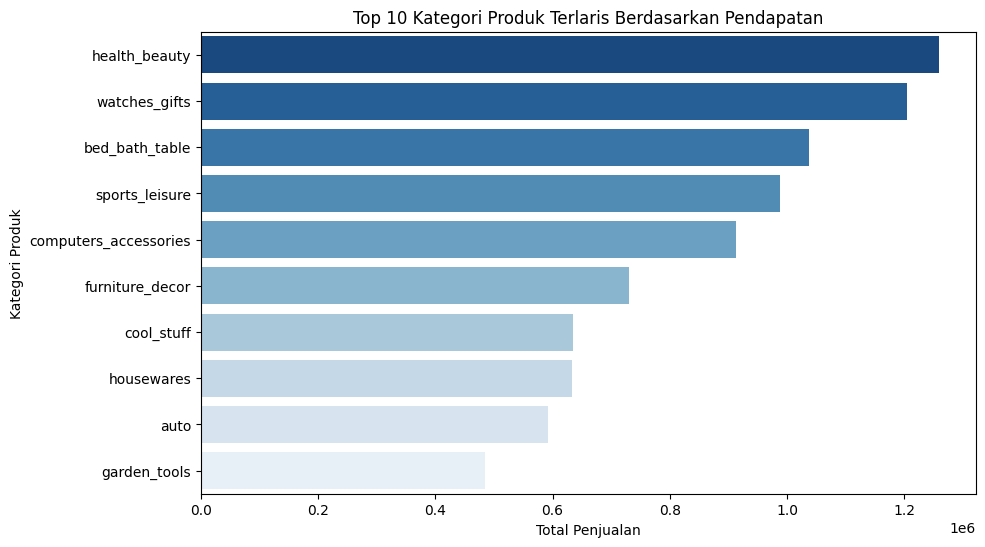

In [32]:
# Visualisasi penjualan per kategori produk
plt.figure(figsize=(10, 6))
top_categories = category_sales.head(10)  # Ambil 10 kategori terlaris
sns.barplot(x='price', y='product_category_name_english', data=top_categories, palette='Blues_r')
plt.title('Top 10 Kategori Produk Terlaris Berdasarkan Pendapatan')
plt.xlabel('Total Penjualan')
plt.ylabel('Kategori Produk')
plt.show()

### Pertanyaan 2: Daerah mana pelanggan berasal dan daerah mana yang mendominasi penjualan?

In [106]:
# Membuat peta dasar
m = folium.Map(location=[-15.7801, -47.9292], zoom_start=4)  # Lokasi pusat Brazil (atau sesuaikan dengan negara lain)

# Transformasi nilai price dengan logaritma untuk mengurangi perbedaan yang mencolok
sales_per_state['log_price'] = np.log(sales_per_state['price'] + 1)  # Menambahkan +1 untuk menghindari log(0)

# Buat dictionary yang memetakan seller_state ke nilai log_price
log_sales_dict = sales_per_state.set_index('seller_state')['log_price'].to_dict()

# Definisikan colormap berdasarkan rentang nilai log_price
min_log_sales = min(log_sales_dict.values())
max_log_sales = max(log_sales_dict.values())
colormap = LinearColormap(colors=[(255, 246, 150), (6, 77, 0)], vmin=min_log_sales, vmax=max_log_sales)

# Menambahkan GeoJson ke peta dengan style function menggunakan nilai log_price
folium.GeoJson(
    geojson_data,
    name="Penjualan",
    style_function=lambda feature: {
        # Menggunakan SIGLA dari GeoJSON untuk mencocokkan dengan seller_state dan mewarnai berdasarkan log_price
        'fillColor': colormap(log_sales_dict.get(feature['properties']['SIGLA'], 0)),  # Default ke 0 jika tidak ada data
        'color': 'black',
        'weight': 1,
        "dashArray": "5, 5",
        'fillOpacity': .8,
    },
    # Modifikasi tooltip untuk menampilkan state dan nilai penjualan yang sudah ditransformasi
    tooltip=folium.GeoJsonTooltip(
        fields=['SIGLA'],  # Menampilkan kode negara bagian (SIGLA)
        aliases=['State: '],
    )
).add_to(m)

# Tambahkan colormap ke peta
colormap.add_to(m)

# Tampilkan peta
m

**Insight:**
- xxx
- xxx

## Analisis Lanjutan (Opsional)

## Conclusion

- Conclution pertanyaan 1
- Conclution pertanyaan 2